# Diabetes Analysis

## Importing Data Analysis and Visualization Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
plt.style.use('fivethirtyeight')

## Read the CSV File

In [4]:
diabetes = pd.read_csv('diabetes.csv')

In [5]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

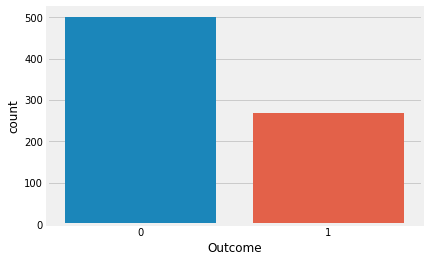

In [8]:
sns.countplot(x='Outcome',data=diabetes)

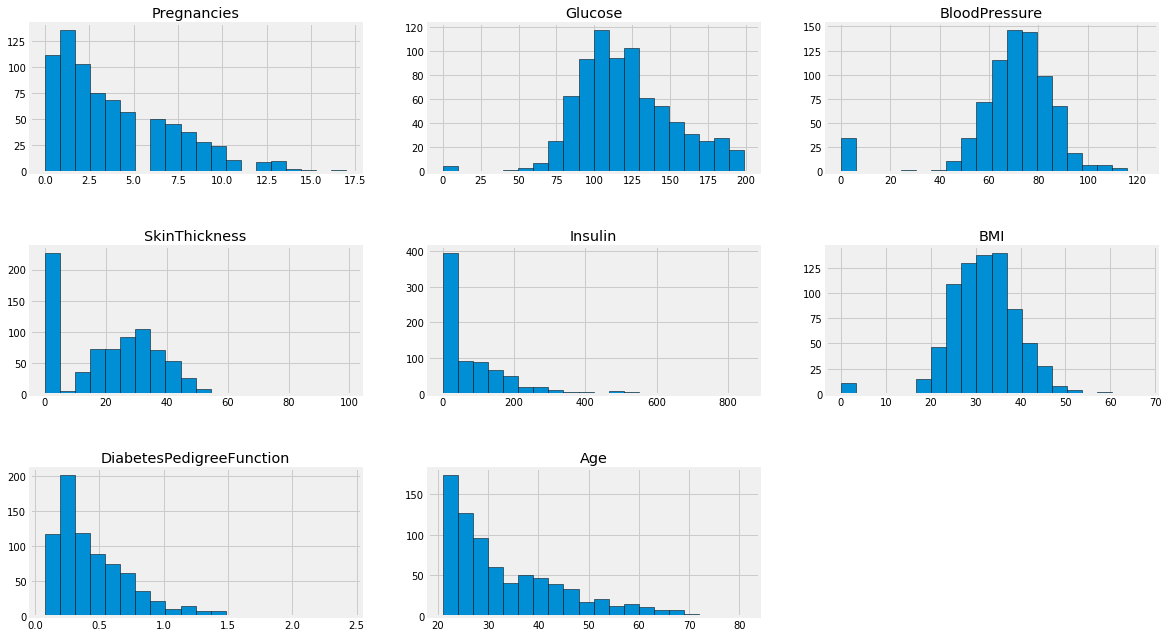

In [9]:
columns=diabetes.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diabetes[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()


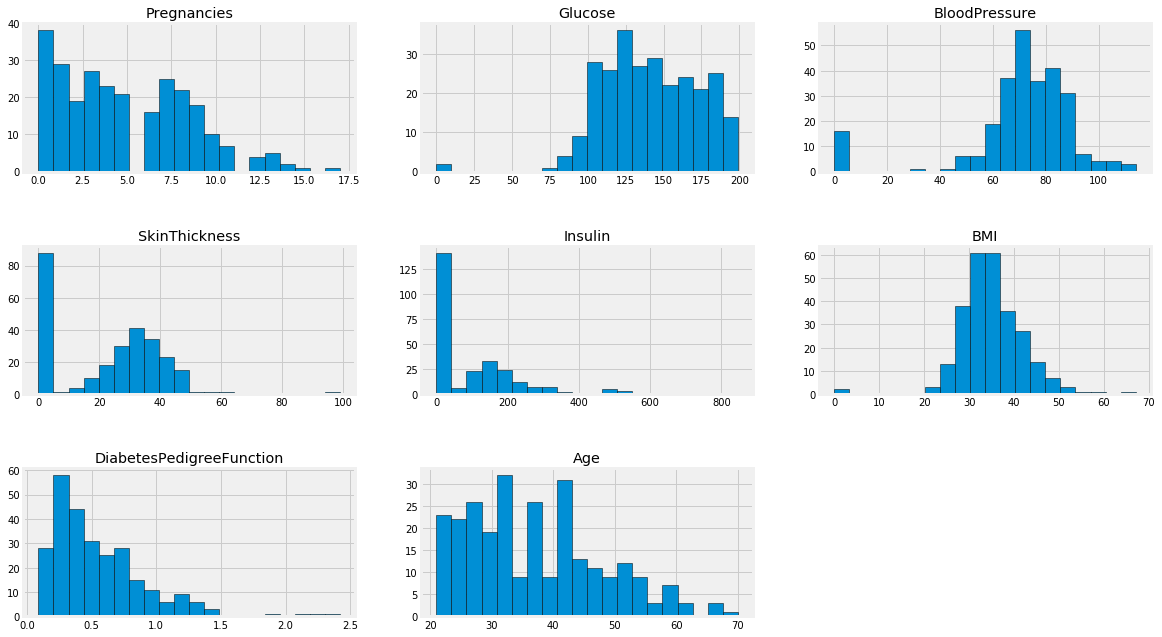

In [10]:
diab1=diabetes[diabetes['Outcome']==1]
columns=diabetes.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


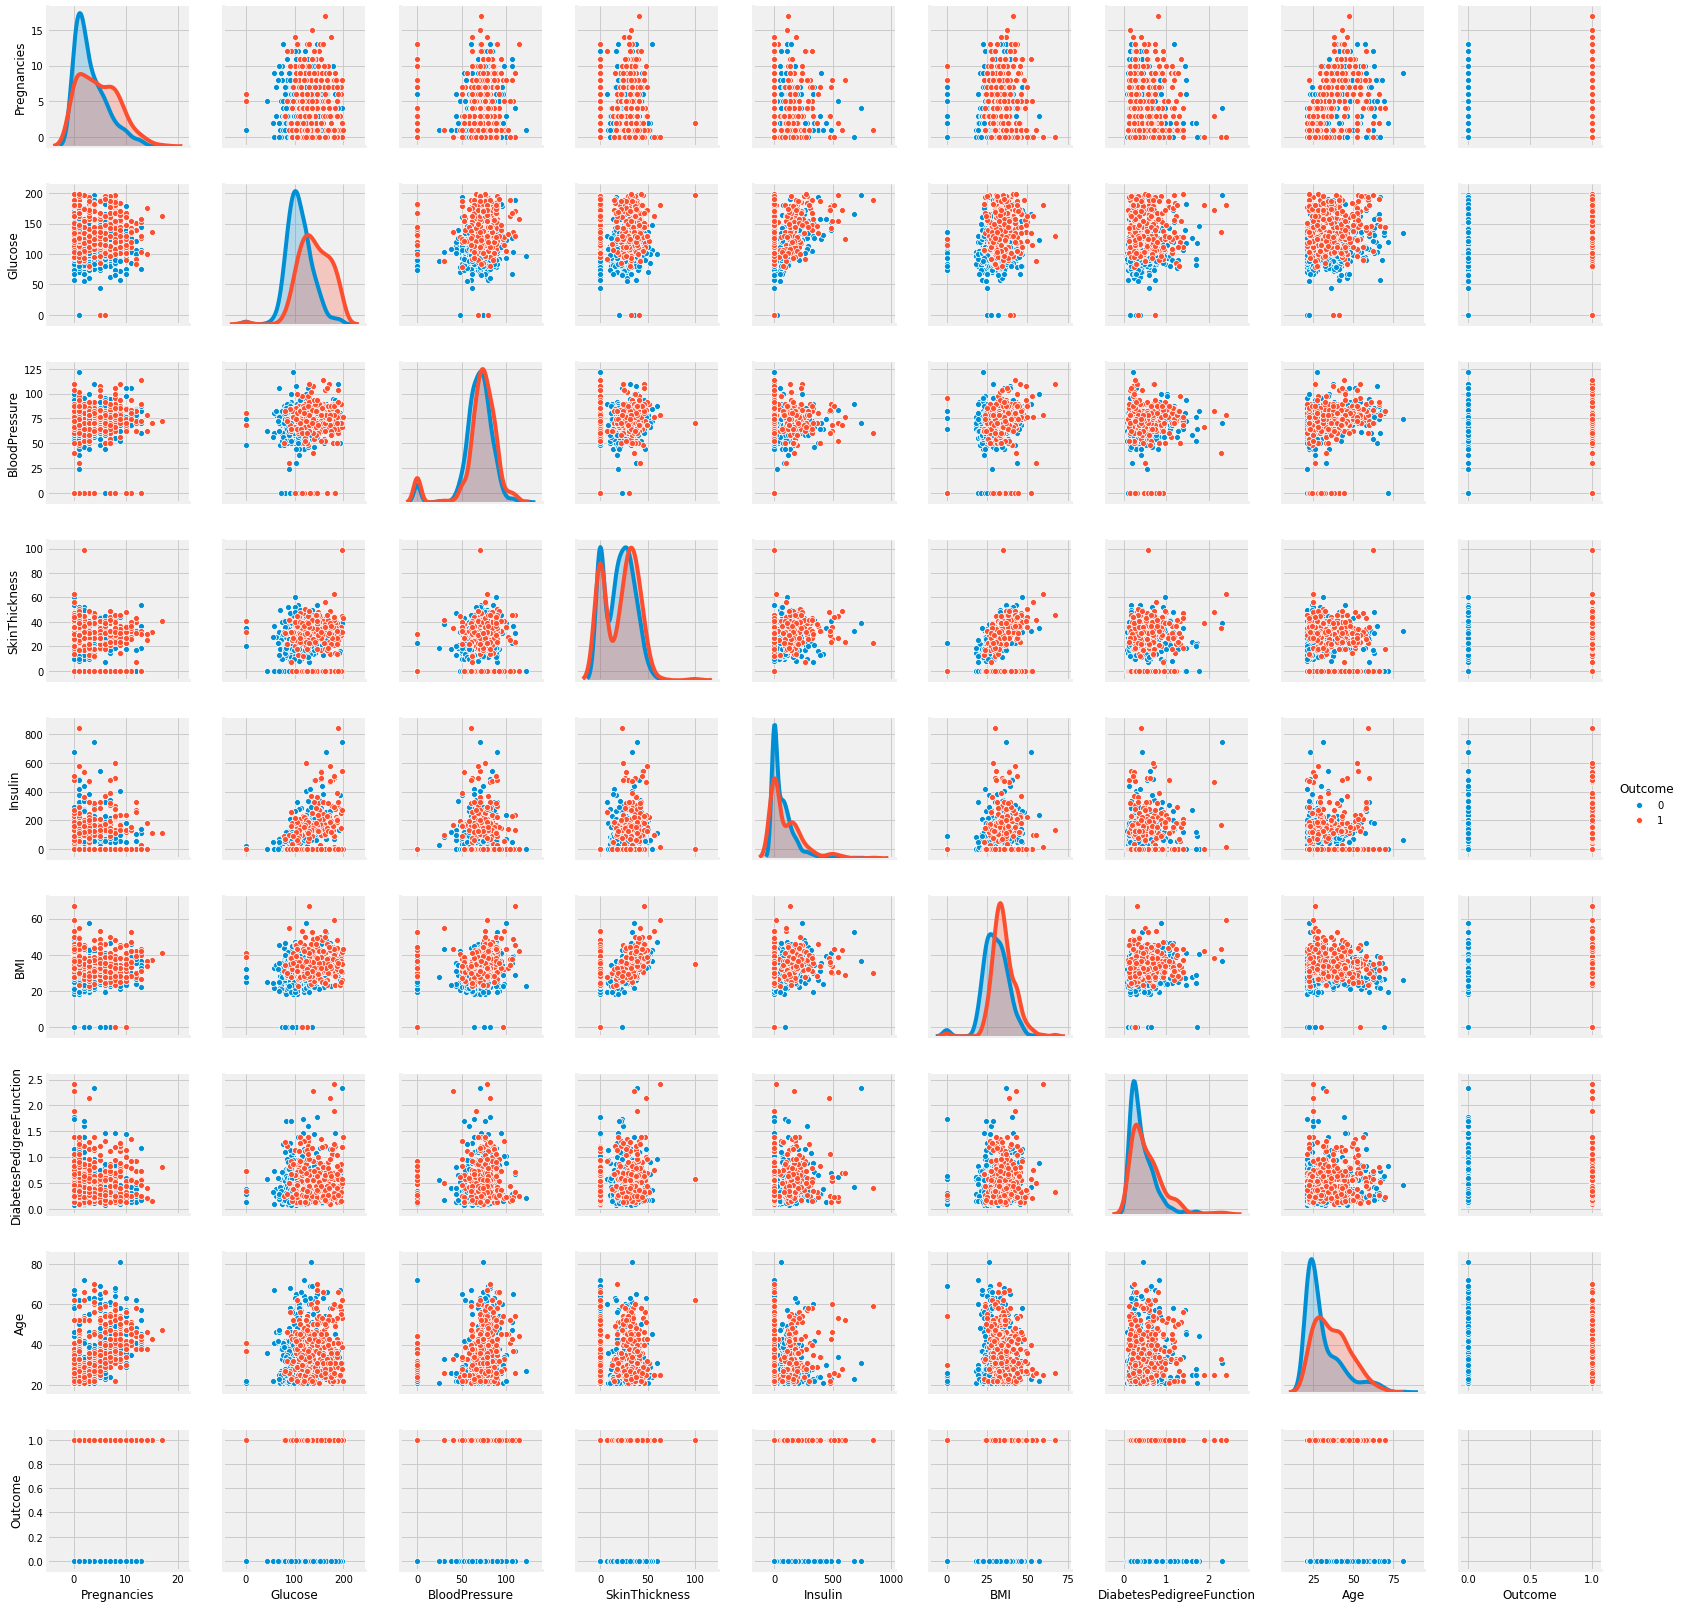

In [11]:
sns.pairplot(data=diabetes,hue='Outcome',diag_kind='kde')
plt.show()

## Importing Mahine Learning Libraries

In [12]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Dropping the variable to be predicted which is the feature 'Outcome' and storing the rest of the dataframe in X.

Storing the target variable in the variable 'y'.

Using the train_test_split method.

In [13]:
X = diabetes.drop('Outcome',axis=1)
y = diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
711,5,126,78,27,22,29.6,0.439,40
58,0,146,82,0,0,40.5,1.781,44
216,5,109,62,41,129,35.8,0.514,25
168,4,110,66,0,0,31.9,0.471,29
658,11,127,106,0,0,39.0,0.190,51


In [15]:
y_train.head()

711    0
58     0
216    1
168    0
658    0
Name: Outcome, dtype: int64

## Logistic Regression

In [16]:
model = LogisticRegression()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print('Accuracy using Logistic Regression is:',accuracy_score(prediction,y_test))
print(confusion_matrix(prediction,y_test))
print(classification_report(prediction,y_test))

Accuracy using Logistic Regression is: 0.7835497835497836
[[136  36]
 [ 14  45]]
             precision    recall  f1-score   support

          0       0.91      0.79      0.84       172
          1       0.56      0.76      0.64        59

avg / total       0.82      0.78      0.79       231



## Decision Tree

In [17]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the Decision Tree is',accuracy_score(prediction,y_test))
print(confusion_matrix(prediction,y_test))
print(classification_report(prediction,y_test))

The accuracy of the Decision Tree is 0.7012987012987013
[[112  31]
 [ 38  50]]
             precision    recall  f1-score   support

          0       0.75      0.78      0.76       143
          1       0.62      0.57      0.59        88

avg / total       0.70      0.70      0.70       231



## K Neighbors Classification

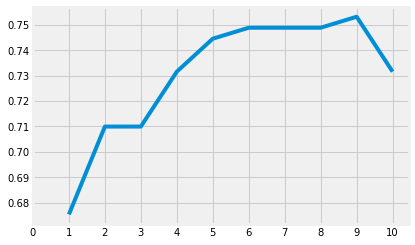

Accuracies for different values of n are: [0.67532468 0.70995671 0.70995671 0.73160173 0.74458874 0.74891775
 0.74891775 0.74891775 0.75324675 0.73160173]


In [18]:
a_index = list(range(1,11))
a = pd.Series()
x = [0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    a=a.append(pd.Series(accuracy_score(prediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)
plt.show()
print('Accuracies for different values of n are:',a.values)

## Plotting a Heatmap of the columns

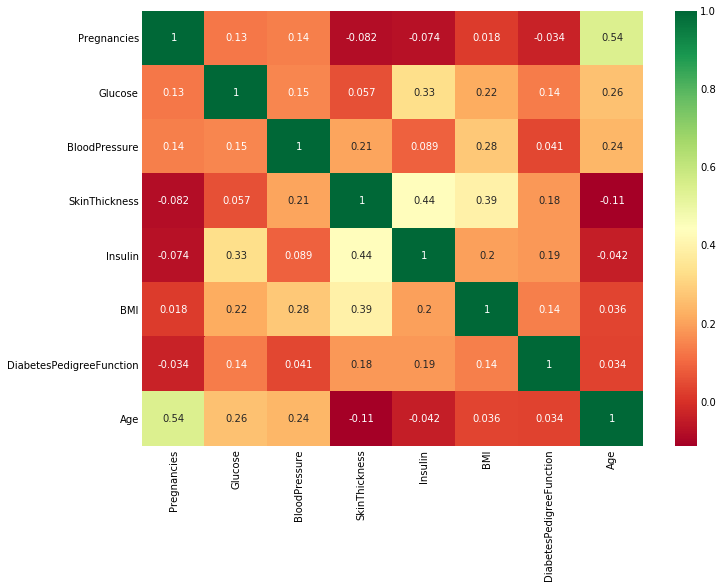

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(diabetes[diabetes.columns[:8]].corr(),annot=True,cmap='RdYlGn')

All the features look to be uncorrelated. So we cannot eliminate any features just by looking at the correlation matrix.

## Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200,random_state=101)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of Random Forest Algorithm is',accuracy_score(prediction,y_test))
print(confusion_matrix(prediction,y_test))
print(classification_report(prediction,y_test))

The accuracy of Random Forest Algorithm is 0.7619047619047619
[[123  28]
 [ 27  53]]
             precision    recall  f1-score   support

          0       0.82      0.81      0.82       151
          1       0.65      0.66      0.66        80

avg / total       0.76      0.76      0.76       231



## Feature Selection and Importance

In [21]:
pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False)

Glucose                     0.257545
BMI                         0.165178
Age                         0.146648
DiabetesPedigreeFunction    0.122522
BloodPressure               0.082414
Pregnancies                 0.082132
SkinThickness               0.072713
Insulin                     0.070847
dtype: float64

Here we can see the most important features used for classification. 

1)A lot many features can affect the accuracy of the algorithm.

2)Feature Extraction means to select only the important features in-order to improve the accuracy of the algorithm.

3)It reduces training time and reduces overfitting

4)We can choose important features in 2 ways:

a)Correlation matrix--> selecting only the uncorrelated features.

b)RandomForestClassifier--> It gives the importance of the features

Important thing to note here is, the important features are: Glucose, BMI, Age, DiabetesPedigreeFunction.

In [37]:
diab2 = diabetes[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]

X1 = diab2.drop('Outcome',axis=1)
y1 = diab2['Outcome']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=101)


In [38]:
model = RandomForestClassifier(n_estimators=200,random_state=101)
model.fit(X1_train,y1_train)
prediction=model.predict(X1_test)
print('The accuracy of Random Forest Algorithm is',accuracy_score(prediction,y1_test))
print(confusion_matrix(prediction,y1_test))
print(classification_report(prediction,y1_test))

The accuracy of Random Forest Algorithm is 0.7619047619047619
[[123  28]
 [ 27  53]]
             precision    recall  f1-score   support

          0       0.82      0.81      0.82       151
          1       0.65      0.66      0.66        80

avg / total       0.76      0.76      0.76       231



In [39]:
model = LogisticRegression()
model.fit(X1_train,y1_train)
prediction = model.predict(X1_test)
print('Accuracy using Logistic Regression is:',accuracy_score(prediction,y1_test))
print(confusion_matrix(prediction,y1_test))
print(classification_report(prediction,y1_test))

Accuracy using Logistic Regression is: 0.7878787878787878
[[137  36]
 [ 13  45]]
             precision    recall  f1-score   support

          0       0.91      0.79      0.85       173
          1       0.56      0.78      0.65        58

avg / total       0.82      0.79      0.80       231



In [41]:
model=DecisionTreeClassifier()
model.fit(X1_train,y1_train)
prediction=model.predict(X1_test)
print('The accuracy of the Decision Tree is',accuracy_score(prediction,y1_test))
print(confusion_matrix(prediction,y1_test))
print(classification_report(prediction,y1_test))

The accuracy of the Decision Tree is 0.6926406926406926
[[112  33]
 [ 38  48]]
             precision    recall  f1-score   support

          0       0.75      0.77      0.76       145
          1       0.59      0.56      0.57        86

avg / total       0.69      0.69      0.69       231



Despite picking only the main features of the dataset, we don't see any additional increases in the accuracy which is interesting. The accuracy of the Decision Tree infact decreases. 